In [566]:
import pandas as pd, numpy as np



#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Loading

In [567]:
sample = pd.read_csv(r'Downloads\sample.csv')

test = pd.read_csv(r'Downloads\test.csv')

train = pd.read_csv(r'Downloads\train.csv')

data_dict = pd.read_csv(r'Downloads\data_dictionary.csv')




In [568]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [569]:
i = [train,test,sample]

s = [k.shape for k in i]

s

 

[(69999, 172), (30000, 171), (30000, 2)]

In [570]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [571]:
train.info(verbose = True, null_counts = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [572]:
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [573]:
train.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

<BarContainer object of 2 artists>

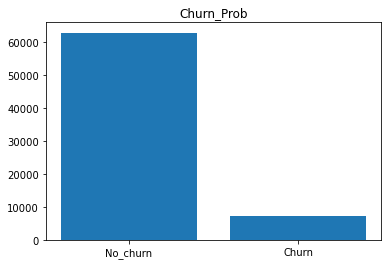

In [574]:
x = np.array(["No_churn","Churn"])
y = np.array([62867,7132])

plt.title('Churn_Prob')

plt.bar(x,y)

In [575]:
miss_value = pd.DataFrame(round(100*(train.isnull().sum()/len(train)),2),columns =['miss %'])

miss_value.sort_values('miss %',ascending = 0).head(50)

,miss %
arpu_3g_6,74.90
count_rech_2g_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90


### Since 73.69% is a big number for null values dropping all

In [576]:
train = train.drop(['arpu_3g_6',
'count_rech_2g_6',
'night_pck_user_6',
'arpu_2g_6',
'date_of_last_rech_data_6',
'total_rech_data_6',
'av_rech_amt_data_6',
'max_rech_data_6',
'count_rech_3g_6',
'fb_user_6',
'night_pck_user_7',
'date_of_last_rech_data_7',
'total_rech_data_7',
'max_rech_data_7',
'fb_user_7',
'count_rech_2g_7',
'count_rech_3g_7',
'arpu_3g_7',
'av_rech_amt_data_7',
'arpu_2g_7',
'count_rech_2g_8',
'av_rech_amt_data_8',
'night_pck_user_8',
'max_rech_data_8',
'total_rech_data_8',
'arpu_2g_8',
'arpu_3g_8',
'date_of_last_rech_data_8',
'fb_user_8',
'count_rech_3g_8'],axis = 1)

In [577]:
train.shape

(69999, 142)

In [578]:
miss_value = pd.DataFrame(round(100*(train.isnull().sum()/len(train)),2),columns =['miss %'])

m = miss_value.sort_values('miss %',ascending = 0).head(60)

m

,miss %
roam_og_mou_8,5.29
og_others_8,5.29
spl_og_mou_8,5.29
loc_ic_t2t_mou_8,5.29
loc_og_t2m_mou_8,5.29
loc_og_t2c_mou_8,5.29
loc_ic_t2m_mou_8,5.29
loc_og_t2t_mou_8,5.29
loc_ic_t2f_mou_8,5.29
std_og_t2f_mou_8,5.29


In [579]:
miss_value.dtypes

miss %    float64
dtype: object

In [580]:
list(m.index)


['roam_og_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_mou_8',
 'isd_og_mou_8',
 'roam_ic_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_mou_8',
 'offnet_mou_8',
 'std_ic_t2m_mou_8',
 'onnet_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'std_og_t2c_mou_8',
 'isd_ic_mou_8',
 'std_og_t2m_mou_8',
 'ic_others_8',
 'loc_og_t2f_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'std_og_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'std_og_t2c_mou_6',
 'og_others_6',
 'offnet_mou_6',
 'onnet_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6

In [581]:
l = ['roam_og_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_mou_8',
 'isd_og_mou_8',
 'roam_ic_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_mou_8',
 'offnet_mou_8',
 'std_ic_t2m_mou_8',
 'onnet_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'std_og_t2c_mou_8',
 'isd_ic_mou_8',
 'std_og_t2m_mou_8',
 'ic_others_8',
 'loc_og_t2f_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'std_og_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'std_og_t2c_mou_6',
 'og_others_6',
 'offnet_mou_6',
 'onnet_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2f_mou_6',
 'loc_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_ic_t2o_mou_7',
 'onnet_mou_7']

for i in l:
    train[i].fillna(0, inplace = True)



In [582]:
miss_value = pd.DataFrame(round(100*(train.isnull().sum()/len(train)),2),columns =['miss %'])

miss_value.sort_values('miss %',ascending = 0).head(60)

m = miss_value.sort_values('miss %',ascending = 0).head(35)




In [583]:
list(m.index)

['std_og_t2m_mou_7',
 'og_others_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'ic_others_7',
 'loc_og_t2t_mou_7',
 'isd_ic_mou_7',
 'loc_ic_t2t_mou_7',
 'spl_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'loc_og_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'offnet_mou_7',
 'roam_og_mou_7',
 'roam_ic_mou_7',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'loc_og_t2o_mou',
 'last_date_of_month_7']

In [584]:
 l  = ['std_og_t2m_mou_7',
 'og_others_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'ic_others_7',
 'loc_og_t2t_mou_7',
 'isd_ic_mou_7',
 'loc_ic_t2t_mou_7',
 'spl_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'loc_og_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'offnet_mou_7',
 'roam_og_mou_7',
 'roam_ic_mou_7',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'loc_og_t2o_mou',
 'last_date_of_month_7']

for i in l:
    train[i].fillna(0, inplace = True)

In [585]:
miss_value = pd.DataFrame(round(100*(train.isnull().sum()/len(train)),2),columns =['miss %'])

miss_value.sort_values('miss %',ascending = 0).head(60)

,miss %
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
spl_ic_mou_6,0.0
spl_ic_mou_7,0.0
isd_ic_mou_6,0.0
std_ic_mou_6,0.0


## High Valued Customer

In [586]:
print(train.arpu_6.quantile(0.75))

print(train.arpu_7.quantile(0.75))

train.arpu_8.quantile(0.75)



370.791
365.3695


369.909

In [587]:
train.arpu_6[train.arpu_6 > 370.791000].value_counts().sum()

17500

In [588]:
train.arpu_7[train.arpu_7 > 365.369500].value_counts().sum()

17500

In [589]:
train.arpu_8[train.arpu_8 > 369.909000].value_counts().sum()

17500

In [590]:
#droping circle_id just a unique indentifier

train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [591]:
# droping id and circel id being a unique identifier

train = train.drop(['id','circle_id'],axis = 1)

In [592]:
train.shape

(69999, 140)

In [593]:
train.corr()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,...,0.186164,0.179641,0.085993,0.066930,0.050399,0.025875,0.168365,0.184225,0.217785,0.025351
arpu_7,NaN,NaN,NaN,0.743730,1.000000,0.782332,0.321251,0.431210,0.343558,0.466002,...,0.274479,0.204451,0.061984,0.094972,0.065798,0.023818,0.189943,0.218318,0.171154,-0.057809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aon,NaN,NaN,NaN,0.025875,0.023818,0.033256,-0.035589,-0.037160,-0.033157,0.009919,...,0.007813,0.012981,-0.032153,-0.031595,-0.031420,1.000000,0.006073,0.006673,0.001365,-0.135177
aug_vbc_3g,NaN,NaN,NaN,0.168365,0.189943,0.224868,-0.011448,-0.008113,-0.002745,0.017833,...,0.368979,0.442081,0.089433,0.089689,0.101584,0.006073,1.000000,0.691012,0.573275,-0.063040
jul_vbc_3g,NaN,NaN,NaN,0.184225,0.218318,0.177637,-0.010826,-0.006742,-0.006465,0.018040,...,0.449780,0.372204,0.105736,0.103164,0.085656,0.006673,0.691012,1.000000,0.676636,-0.040102
jun_vbc_3g,NaN,NaN,NaN,0.217785,0.171154,0.157545,-0.006267,-0.011190,-0.007070,0.024786,...,0.363529,0.343072,0.103249,0.093014,0.077467,0.001365,0.573275,0.676636,1.000000,-0.022574


## feature engineering 

In [594]:
train.dtypes[train.dtypes == object]

last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
date_of_last_rech_6     object
date_of_last_rech_7     object
date_of_last_rech_8     object
dtype: object

In [595]:
s = ['last_date_of_month_6',  
'last_date_of_month_7' ,
'last_date_of_month_8'   ,
'date_of_last_rech_6'  ,
'date_of_last_rech_7' , 
'date_of_last_rech_8']

for i in s:
    train[i] = pd.to_datetime(train[i])

In [596]:
train.dtypes[train.dtypes == 'datetime64[ns]']

last_date_of_month_6    datetime64[ns]
last_date_of_month_7    datetime64[ns]
last_date_of_month_8    datetime64[ns]
date_of_last_rech_6     datetime64[ns]
date_of_last_rech_7     datetime64[ns]
date_of_last_rech_8     datetime64[ns]
dtype: object

In [597]:
train['recharge_last_8'] = train.date_of_last_rech_8.dt.day 
train['recharge_last_7'] = train.date_of_last_rech_7.dt.day 
train['recharge_last_6'] = train.date_of_last_rech_6.dt.day 

In [598]:
# droping above all we have day no need for year 
train = train.drop(['last_date_of_month_6',  
'last_date_of_month_7' ,
'last_date_of_month_8'   ,
'date_of_last_rech_6'  ,
'date_of_last_rech_7' , 
'date_of_last_rech_8']
, 1)


In [599]:
train = train.astype({"recharge_last_6": str},1)
train = train.astype({"recharge_last_7": str},1)
train = train.astype({"recharge_last_8": str},1)

In [600]:
train.dtypes

loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
arpu_6               float64
arpu_7               float64
                      ...   
jun_vbc_3g           float64
churn_probability      int64
recharge_last_8       object
recharge_last_7       object
recharge_last_6       object
Length: 137, dtype: object

<AxesSubplot:>

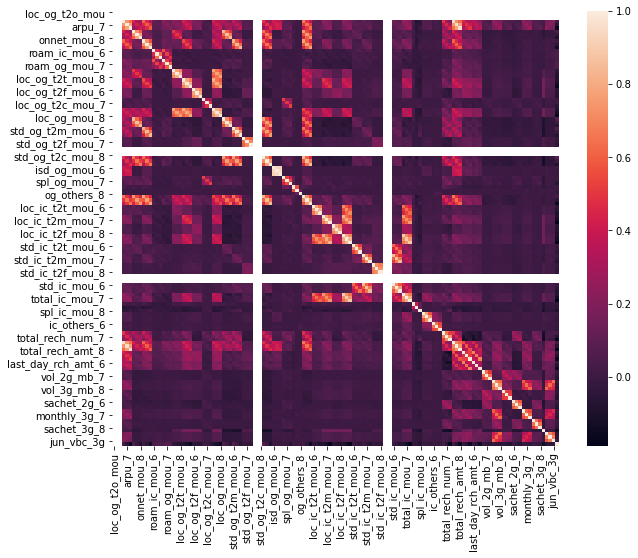

In [601]:
m = train

plt.figure(figsize=(10,8))

sns.heatmap(m.corr())

### Let' do PCA for demension reduction

In [602]:
last_column = train.pop('churn_probability')


In [603]:

train.insert(136, 'churn_probability', last_column)
  

In [604]:
X = train.iloc[:,:-1]

y = train.iloc[:,-1]

In [605]:
print(X.shape)      

y.head()

(69999, 136)


0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 136), (21000, 136), (48999,), (21000,))

<AxesSubplot:>

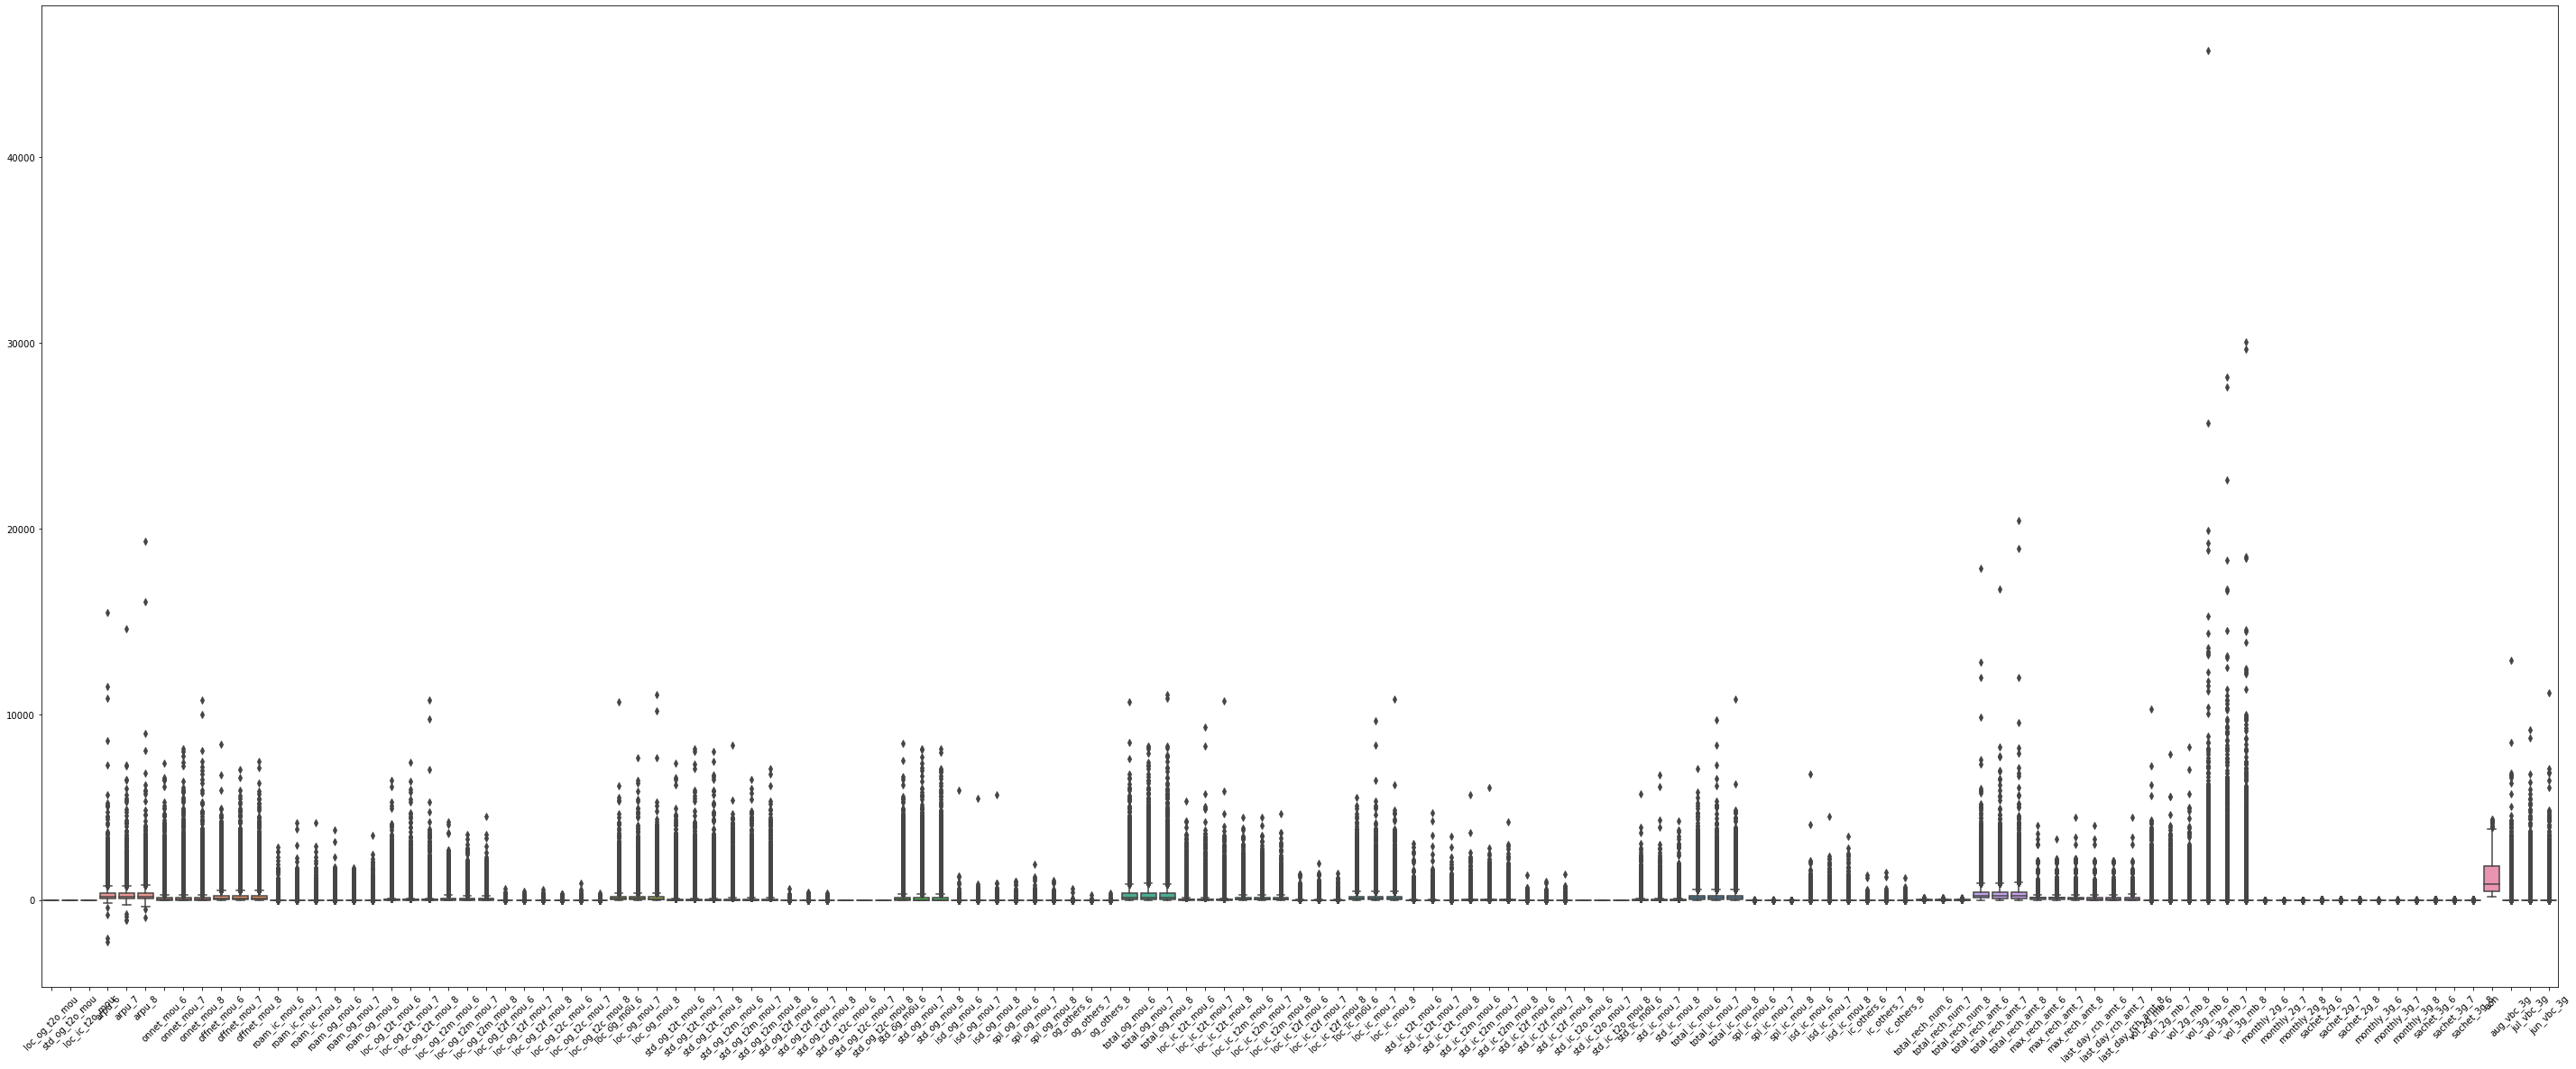

In [607]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

In [608]:
X_train1  = X_train

In [609]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

In [610]:
type(X_train)

numpy.ndarray

<AxesSubplot:>

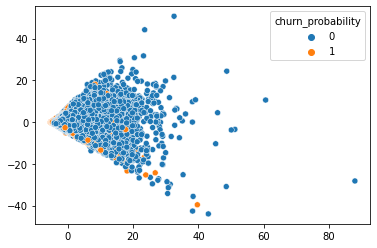

In [611]:
pca = PCA()

pca_components = pca.fit_transform(X_train)

sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<AxesSubplot:>

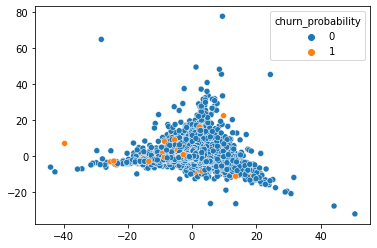

In [612]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

In [613]:
pca.components_
               

array([[-1.38481705e-19,  1.38777878e-16,  3.33066907e-16, ...,
         5.33589667e-02,  6.76895674e-02,  7.34994262e-02],
       [ 7.30824159e-20, -6.24500451e-17,  2.77555756e-17, ...,
        -4.45580746e-02, -3.48020528e-02, -2.96923876e-02],
       [ 9.60986877e-19, -1.11022302e-16,  2.77555756e-16, ...,
        -1.16198936e-02, -1.92600125e-02, -2.42388530e-02],
       ...,
       [ 0.00000000e+00, -7.33290330e-02,  5.21808017e-02, ...,
        -5.20417043e-18,  6.24500451e-17,  8.15320034e-17],
       [ 9.99998242e-01, -1.52122270e-03, -1.07562035e-03, ...,
         1.89735380e-19, -1.35525272e-19,  1.35525272e-20],
       [-0.00000000e+00,  5.53701414e-01, -8.10256198e-01, ...,
         4.16333634e-17, -4.16333634e-17, -5.55111512e-17]])

In [614]:
pca.explained_variance_ratio_

array([1.34060575e-01, 7.49137224e-02, 5.09599563e-02, 4.43000464e-02,
       3.57514618e-02, 3.19877532e-02, 2.69164593e-02, 2.56588965e-02,
       2.43225445e-02, 2.38742550e-02, 2.35255464e-02, 2.20369806e-02,
       2.11932023e-02, 2.10674383e-02, 1.97389594e-02, 1.71097544e-02,
       1.62191370e-02, 1.47121544e-02, 1.42276202e-02, 1.35270003e-02,
       1.32631816e-02, 1.23332917e-02, 1.18116231e-02, 1.16221442e-02,
       1.10837921e-02, 1.03884394e-02, 9.52446423e-03, 9.48444802e-03,
       8.96160069e-03, 8.32849289e-03, 7.98443214e-03, 7.78554277e-03,
       7.53737325e-03, 7.44276857e-03, 7.01262274e-03, 6.99003536e-03,
       6.68892235e-03, 6.49829888e-03, 6.37316606e-03, 6.18415309e-03,
       5.77255953e-03, 5.69700825e-03, 5.47984448e-03, 5.42293883e-03,
       5.33909009e-03, 5.02436522e-03, 4.94872477e-03, 4.60667934e-03,
       4.47997859e-03, 4.22496373e-03, 4.17939406e-03, 4.08519527e-03,
       4.06693362e-03, 4.00347024e-03, 3.98212794e-03, 3.86681130e-03,
      

In [615]:
len(y_train),len(pca_components)

(y_train).shape,pca_components.shape

y_train = np.array(y_train)

In [616]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf.fit(pca_components, y_train)

rf.feature_importances_




array([0.05694352, 0.02466868, 0.00838824, 0.00959259, 0.00885384,
       0.00807605, 0.00772271, 0.01676112, 0.04257943, 0.03090029,
       0.02317957, 0.00951452, 0.00856941, 0.0070023 , 0.00989505,
       0.01075264, 0.00567243, 0.00667547, 0.00564371, 0.00598321,
       0.0059417 , 0.00526031, 0.00644078, 0.01015354, 0.01480213,
       0.00907941, 0.00827822, 0.00704205, 0.01114185, 0.00999346,
       0.00635052, 0.00682554, 0.00571658, 0.00684713, 0.00950335,
       0.00889501, 0.01010564, 0.00703971, 0.00604791, 0.00639222,
       0.00597724, 0.00580432, 0.00664247, 0.00497125, 0.00626022,
       0.00667591, 0.00708896, 0.00599458, 0.00511654, 0.0051185 ,
       0.00518629, 0.00507215, 0.00461701, 0.00505583, 0.00468314,
       0.0063682 , 0.00586582, 0.00464471, 0.00532669, 0.00493639,
       0.00488289, 0.00506785, 0.00523807, 0.00506343, 0.00442339,
       0.00533629, 0.00467611, 0.00475758, 0.00502676, 0.0049509 ,
       0.00564462, 0.00502331, 0.00449783, 0.00476681, 0.00492

## Important Features

<BarContainer object of 127 artists>

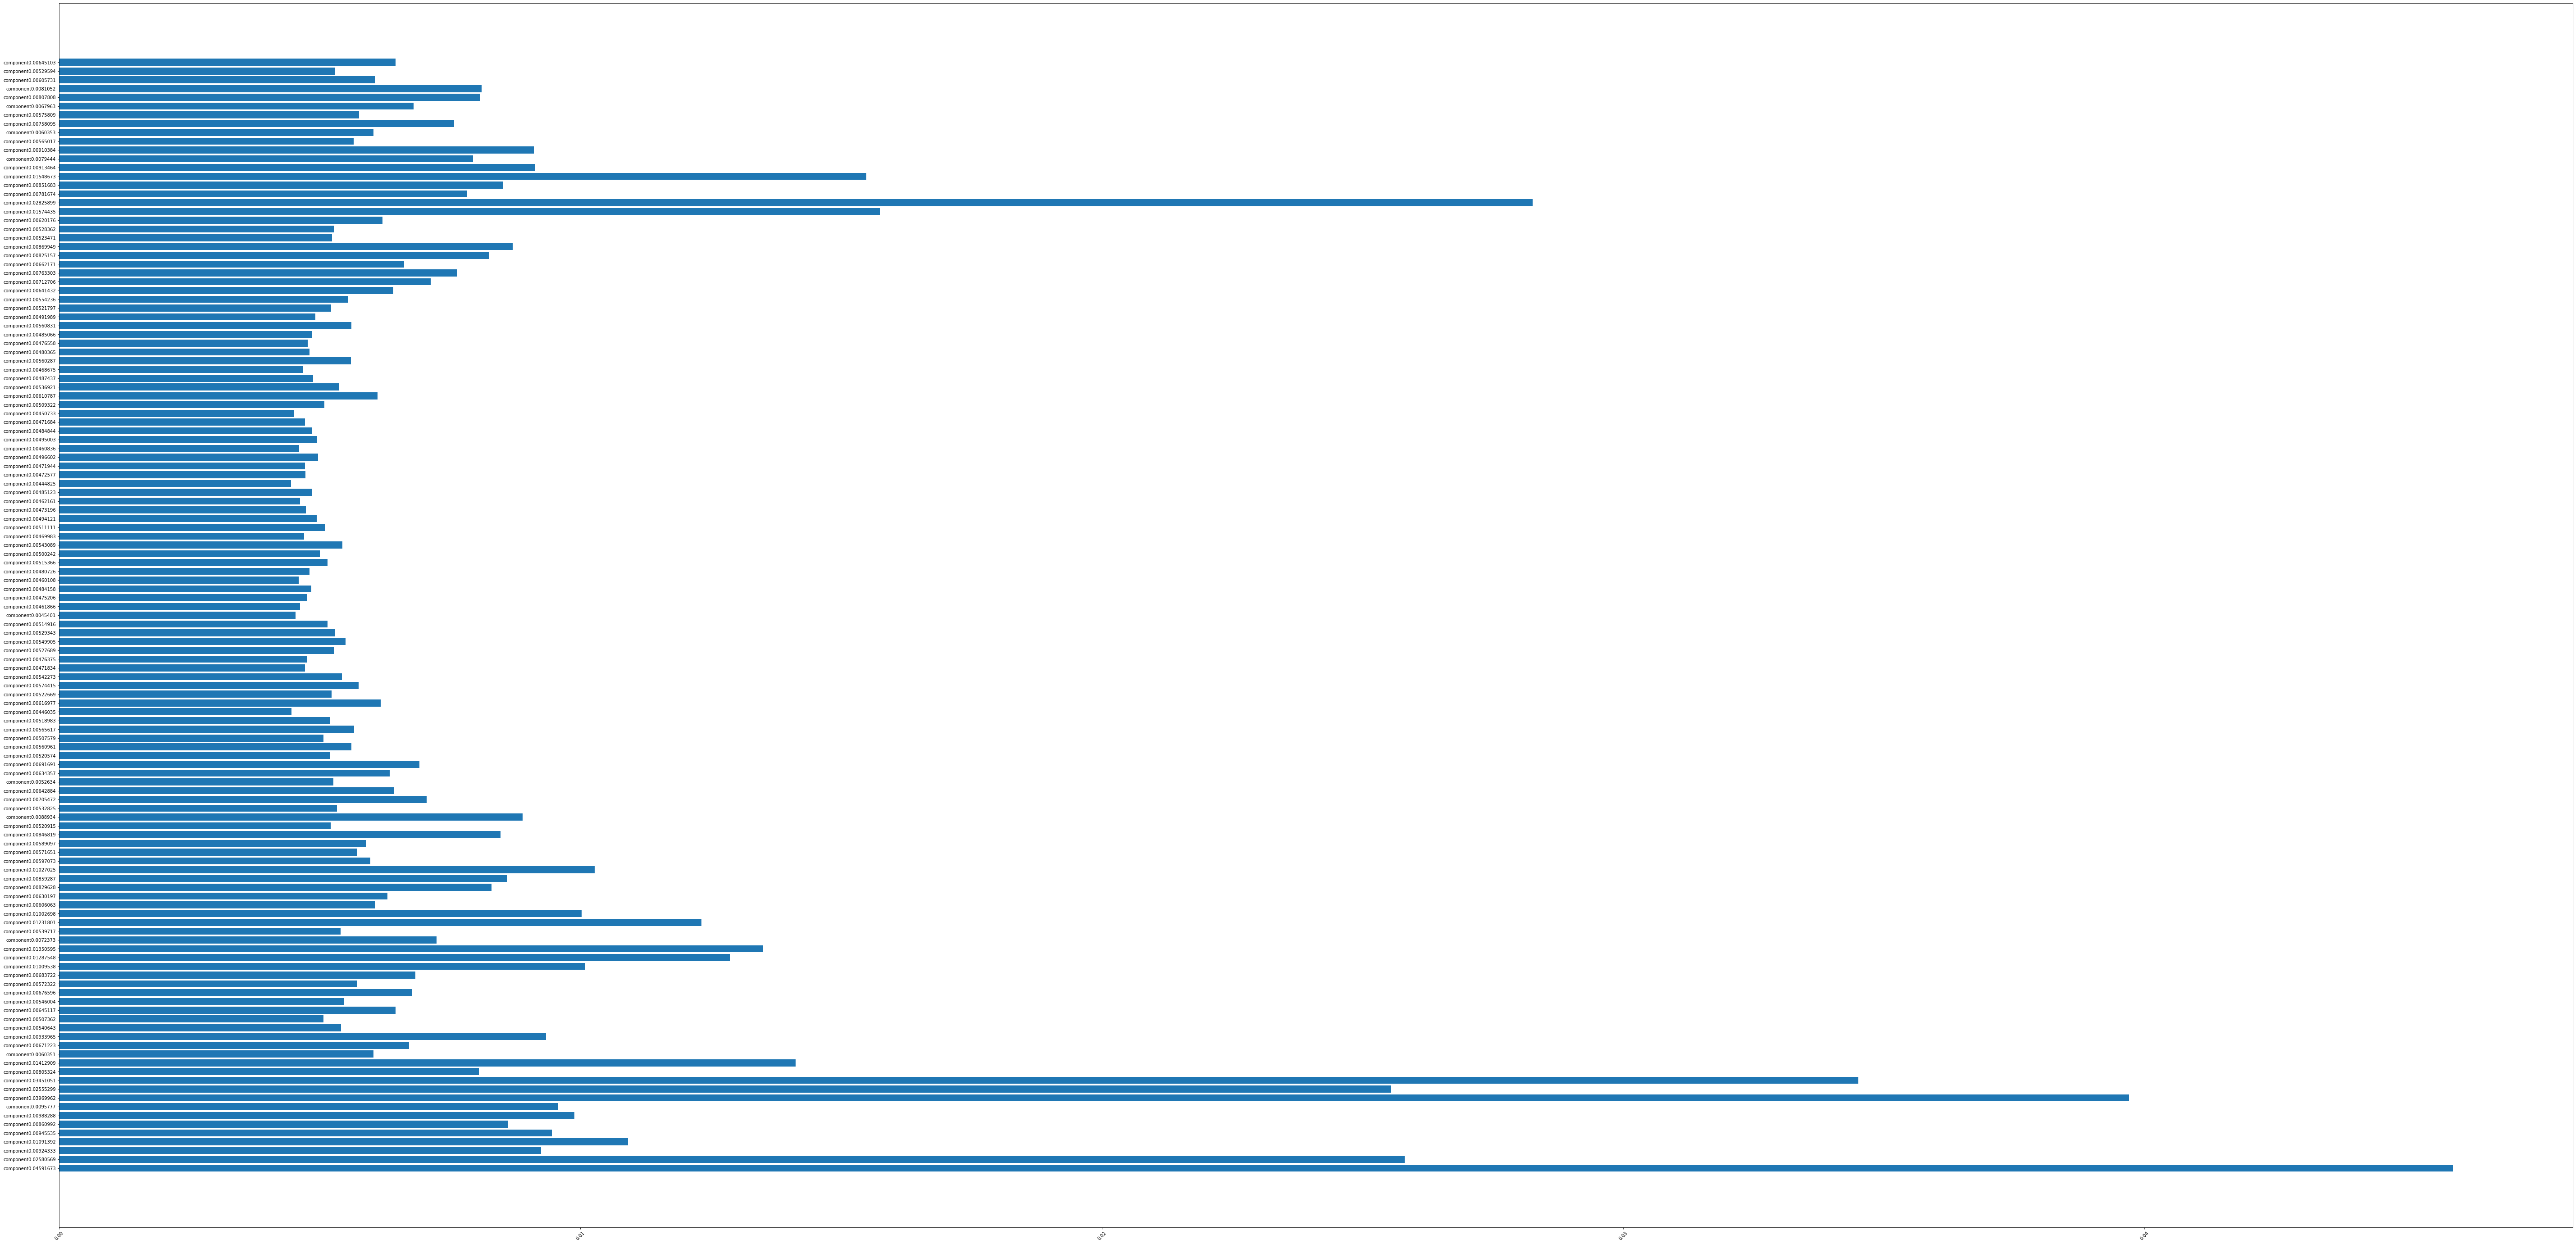

In [617]:
y =[0.04591673, 0.02580569, 0.00924333, 0.01091392, 0.00945535,
       0.00860992, 0.00988288, 0.0095777 , 0.03969962, 0.02555299,
       0.03451051, 0.00805324, 0.01412909, 0.0060351 , 0.00671223,
       0.00933965, 0.00540643, 0.00507362, 0.00645117, 0.00546004,
       0.00676596, 0.00572322, 0.00683722, 0.01009538, 0.01287548,
       0.01350595, 0.0072373 , 0.00539717, 0.01231801, 0.01002698,
       0.00606063, 0.00630197, 0.00829628, 0.00859287, 0.01027025,
       0.00597073, 0.00571651, 0.00589097, 0.00846819, 0.00520915,
       0.0088934 , 0.00532825, 0.00705472, 0.00642884, 0.0052634 ,
       0.00634357, 0.00691691, 0.00520574, 0.00560961, 0.00507579,
       0.00565617, 0.00518983, 0.00446035, 0.00616977, 0.00522669,
       0.00574415, 0.00542273, 0.00471834, 0.00476375, 0.00527689,
       0.00549905, 0.00529343, 0.00514916, 0.0045401 , 0.00461866,
       0.00475206, 0.00484158, 0.00460108, 0.00480726, 0.00515366,
       0.00500242, 0.00543089, 0.00469983, 0.00511111, 0.00494121,
       0.00473196, 0.00462161, 0.00485123, 0.00444825, 0.00472577,
       0.00471944, 0.00496602, 0.00460836, 0.00495003, 0.00484844,
       0.00471684, 0.00450733, 0.00509322, 0.00610787, 0.00536921,
       0.00487437, 0.00468675, 0.00560287, 0.00480365, 0.00476558,
       0.00485066, 0.00560831, 0.00491989, 0.00521797, 0.00554236,
       0.00641432, 0.00712706, 0.00763303, 0.00662171, 0.00825157,
       0.00869949, 0.00523471, 0.00528362, 0.00620176, 0.01574435,
       0.02825899, 0.00781674, 0.00851683, 0.01548673, 0.00913464,
       0.0079444 , 0.00910384, 0.00565017, 0.0060353 , 0.00758095,
       0.00575809, 0.0067963 , 0.00807808, 0.0081052 , 0.00605731,
       0.00529594, 0.00645103]





x = ['component'+str(i) for i in y]

plt.figure(figsize=(100,50))
plt.xticks(rotation=45)
plt.barh(x,y)

In [620]:
logistic_Reg = LogisticRegression()


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)


clf.fit(pca_components[:,:2], y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [627]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1000}
0.9191820198229308


In [631]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         
                        ('grid_search',clf)])

In [632]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA()),
                ('grid_search',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]}))])

In [634]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9203044960101227


In [635]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9000952380952381


In [636]:
confusion_matrix(y_train, pipe.predict(X_train))

array([[43381,   672],
       [ 3233,  1713]], dtype=int64)

In [637]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[18564,   250],
       [ 1848,   338]], dtype=int64)

In [638]:
precision_score(y_test, pipe.predict(X_test))

0.5748299319727891

In [639]:
recall_score(y_test, pipe.predict(X_test))

0.1546203110704483

In [640]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [641]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [642]:
submission_data = test.set_index('id')

submission_data.loc[:,[]]

""
id
69999
70000
70001
70002
70003
...
99994
99995
99996


In [644]:
submission_data = test.set_index('id')[X_train1]
submission_data.drop(['arpu_3g_6',
'count_rech_2g_6',
'night_pck_user_6',
'arpu_2g_6',
'date_of_last_rech_data_6',
'total_rech_data_6',
'av_rech_amt_data_6',
'max_rech_data_6',
'count_rech_3g_6',
'fb_user_6',
'night_pck_user_7',
'date_of_last_rech_data_7',
'total_rech_data_7',
'max_rech_data_7',
'fb_user_7',
'count_rech_2g_7',
'count_rech_3g_7',
'arpu_3g_7',
'av_rech_amt_data_7',
'arpu_2g_7',
'count_rech_2g_8',
'av_rech_amt_data_8',
'night_pck_user_8',
'max_rech_data_8',
'total_rech_data_8',
'arpu_2g_8',
'arpu_3g_8',
'date_of_last_rech_data_8',
'fb_user_8',
'count_rech_3g_8','circle_id', 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8'],axis = 1, inplace = True)


In [ ]:
test['churn_probability'] = pipe.predict(submission_data)
output = test[['id','churn_probability']]
output.head()

In [645]:
output.to_csv('Downloads\submission_pca_lr_15jun_final1.csv',index=False)